In [1]:
#!pip install squircle
#!pip install imutils

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import string
from PIL import Image, ImageFont, ImageDraw

In [76]:
pathToBackGrounds = "C:/Users/Николай/diploma/Backgrounds"
pathToGenerated = "C:/generated"
pathToGT = "C:/gt"
pathToFonts = R"C:\Users\Николай\diploma\fonts"
pathToPhoto = R"C:\Users\Николай\diploma\person"
pathToHolograms = R"C:\Users\Николай\diploma\hologram"

In [4]:
fonts = [os.path.join(pathToFonts, font) for font in os.listdir(pathToFonts)]
photos = [os.path.join(pathToPhoto, photo) for photo in os.listdir(pathToPhoto)]
holograms = [os.path.join(pathToHolograms, photo) for photo in os.listdir(pathToHolograms)]

In [5]:
pathToBackGrounds

'C:/Users/Николай/diploma/Backgrounds'

In [6]:
backGroundColor = np.array([0,0,0])

In [7]:
for file in os.listdir(pathToBackGrounds):
    f = open(os.path.join(pathToBackGrounds, file), "rb")
    chunk = f.read()
    chunk_arr = np.frombuffer(chunk, dtype=np.uint8)
    image = cv2.imdecode(chunk_arr, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.open(os.path.join(pathToBackGrounds, file))
    break

In [8]:
def generateTextImage(text, font, fontScale, thickness, color):

    (label_width, label_height), baseline = cv2.getTextSize(text, font, fontScale, thickness)
    label_patch = np.zeros((label_height + baseline, label_width, 3), np.uint8)
    label_patch[:,:] = 0
    textImage = cv2.putText(label_patch, text, (0, label_height), font, fontScale, color, thickness)
    return textImage

In [9]:
#cv2.imwrite(pathToGenerated + "/2.png", cv2.cvtColor(image2, cv2.COLOR_RGB2BGR))

In [19]:
class TextGenerator:
    def __init__(self):
        self.symbols = list(string.ascii_letters)
        self.digits = [str(i) for i in range(0,10)]
        self.generatedWordsCount = -1
        with open("./texts/names.txt") as f:
            self.names = f.read().split()

        with open("./texts/surnames.txt") as f:
            self.surnames = f.read().split()

        with open("./texts/streets.txt") as f:
            self.streets = f.read().split()

        with open("./texts/cities.txt") as f:
            self.cities = f.read().split()

        with open("./texts/words.txt") as f:
            self.words = f.read().split()

    def getName(self):
        k = np.random.randint(0, len(self.names))
        return self.names[k]

    def getSurname(self):
        k = np.random.randint(0, len(self.surnames))
        return self.surnames[k]

    def getCity(self):
        k = np.random.randint(0, len(self.cities))
        return self.cities[k]

    def getStreet(self):
        k = np.random.randint(0, len(self.streets))
        return self.streets[k]

    def getWord(self):
        k = np.random.randint(0, len(self.words))
        return self.words[k]

    def getDate(self):
        if np.random.randint(0,2) == 0:
            sep = "/"
        else:
            sep = "."
        day = str(np.random.randint(0,10)) + str(np.random.randint(0,10))
        month = str(np.random.randint(0,10)) + str(np.random.randint(0,10))
        year = str(np.random.randint(0,10)) + str(np.random.randint(0,10)) + str(np.random.randint(0,10)) + str(np.random.randint(0,10))
        if np.random.randint(0,2) == 0:
            return sep.join([day, month, year])
        else:
            return sep.join([year, month, day])

    def getNumber(self):
        length = np.random.randint(2, 15)
        return "".join([np.random.choice(self.digits) for i in range(4)])

    def generateText(self):
        self.generatedWordsCount += 1
        if self.generatedWordsCount == 0:
            return self.getName()
        elif self.generatedWordsCount == 1:
            return self.getSurname()
        elif self.generatedWordsCount == 2:
            return self.getCity()
        elif self.generatedWordsCount == 3:
            return self.getStreet()
        elif self.generatedWordsCount < 5:
            return self.getDate()
        elif self.generatedWordsCount < 8:
            return self.getNumber()
        else:
            return self.getWord()

    def resetWords(self):
        self.generatedWordsCount = -1
        
TextGeneratorGlobal = TextGenerator()

In [20]:
import matplotlib
matplotlib.use('Agg')
def addPlotToBackGround(image):
    W,H = image.size
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_ylim([0,H])
    ax.set_xlim([0,W])
    ax.imshow(image)
    x = np.linspace(1,W, W*3)
    ax.set_axis_off()
    if np.random.randint(0,5) == 0:
        cnt = np.random.randint(1,10)
        for i in range(cnt):
            y = np.sin(x * np.exp(np.random.uniform(-5,-1))) * H // cnt + i * H // cnt + np.random.randint(-H // cnt,H // cnt)
            ax.plot(x,y, color=np.random.rand(3,))
    
    if np.random.randint(0,5) ==0:
        cnt = np.random.randint(1,50)
        for i in range(cnt):
            y = 1/(x)* H // cnt + i * H // cnt + np.random.randint(-H // cnt,H // cnt)
            ax.plot(x + np.random.randint(-W, W),y, color=np.random.rand(3,))

    if np.random.randint(0,5) == 0:
        cnt = np.random.randint(1,100)
        for i in range(cnt):
            y = x**(np.random.uniform(0.2,3)) * np.exp(np.random.uniform(-5,1)) + np.random.randint(-H // cnt,H // cnt)
            ax.plot(x + np.random.randint(-W, W),y, color=np.random.rand(3,))
    fig.savefig("./i.png",bbox_inches='tight', pad_inches=0)
    plt.close(1)
    return Image.open("./i.png")

In [71]:
class OneImageTextGenerator:
    def __init__(self, image):
        image = addPlotToBackGround(image)
        self.size = image.size[::-1]#image.shape[0:2]
        self.image2 = image.copy().convert("RGBA")
        self.image = Image.new('RGBA', self.size[::-1], color=(255,255,255, 0))
        self.freeBlocks = [(0,0,*self.size)]
        self.textImage = Image.new('RGBA', self.size[::-1], color=(255,255,255, 0))
        self.textGenerator = TextGeneratorGlobal
        self.textGenerator.resetWords()
        img_fraction = 1/20
        self.fontSize = 1
        font = ImageFont.truetype(fonts[0], self.fontSize)
        draw = ImageDraw.Draw(self.textImage)
        while max(draw.textsize("H", font=font)) < img_fraction * min(image.size):
            # iterate until the text size is just larger than the criteria
            self.fontSize += 1            
            font = ImageFont.truetype(fonts[0], self.fontSize)
        self.fonts = []
        for i in range(np.random.randint(1, 4)):
            self.fonts.append(np.random.choice(fonts))
        self.textType = []
        for i in range(np.random.randint(1, 3)):
            self.textType.append(np.random.choice([0,1,2]))
        self.colors = [(0,0,0,255)]
        for i in range(np.random.randint(0,3)):
            color = [0,0,0, 255]
            color[np.random.randint(0,3)] = np.random.randint(128,200)
            color[0] = min(color[0] + np.random.randint(0,255),255)
            color[2] = min(color[2] + np.random.randint(0,255),255)
            color[1] = min(color[1] + np.random.randint(0,255),255)
            self.colors.append(color)
            self.colors.append(self.colors[0])
        
        self.angles = [0]
        for i in range(np.random.randint(0,2)):
            self.angles.append(np.random.randint(-5,5))
            self.angles.append(0)
        
    def findSmallestByHeightBlock(self, size):
        blocks = []
        p = []
        for i, block in enumerate(self.freeBlocks):
            y1,x1,y2,x2 = block
            h = y2 - y1
            w = x2 - x1
            if h >= size[0] and w >= size[1]:
                blocks.append(i)
                p.append(h*w)
        if len(blocks) == 0:
            return None
        return np.random.choice(blocks, p=np.array(p) / np.sum(p))
        
    def findFreeRectangeForText(self, size):
        index = self.findSmallestByHeightBlock(size)
        if index == None:
            return None
        h, w = size
        rect = self.freeBlocks[index]
        y1,x1,y2,x2 = rect
        startX = np.random.randint(x1, x2 - w + 1)
        startY = np.random.randint(y1, y2 - h + 1)
        
        self.freeBlocks.pop(index)
        if startY > y1:
            self.freeBlocks.append((y1, x1, startY, x2))
        if startY + h < y2:
            self.freeBlocks.append((startY+h, x1, y2, x2))
        if x1 < startX:
            self.freeBlocks.append((startY, x1, startY+h, startX))
        if startX + w < x2:
            self.freeBlocks.append((startY, startX+w, startY+h, x2))
        
        return (startY, startX)

    def addPhoto(self):
        photo = Image.open(np.random.choice(photos), 'r')
        height, width = self.size
        height = height // 4
        width = width // 4
        height, width = max(height, width), min(height, width)

        photo1 = photo.resize((width,height), Image.ANTIALIAS)
        if np.random.randint(0,20) == 0:
            photo1 = photo1.convert('L')
        
        coords = self.findFreeRectangeForText((height, width))
        if coords == None:
            return None
        startY, startX = coords
        self.image.paste(photo1, (startX, startY))        
        
    def addText(self):
        text = self.textGenerator.generateText()
        textType = np.random.choice(self.textType)
        if textType == 0:
            text = text.lower()
        elif textType == 1:
            text = text.upper()
        else:
            text = text.capitalize()

        fontSize = max(15, self.fontSize + np.random.randint(-5, 5))
        if np.random.randint(0, 50) == 0:
            fontSize += np.random.randint(16, 20)
        font = ImageFont.truetype(np.random.choice(self.fonts), fontSize)
        
        draw = ImageDraw.Draw(self.image)
        drawImageText = ImageDraw.Draw(self.textImage)
        alpha = np.random.choice(self.angles)
        h,w = draw.textsize(text, font=font)[::-1]
        angleRad = np.abs(alpha * np.pi / 180)
        h1 = h * np.cos(angleRad) + w * np.sin(angleRad)
        w1 = w * np.cos(angleRad) + h * np.sin(angleRad)
        coords = self.findFreeRectangeForText((h1,w1))
        if coords == None:
            return None
        startY, startX = coords
        
        color = self.colors[np.random.randint(0, len(self.colors))]
        
        txt=Image.new('L', (w,h))
        d = ImageDraw.Draw(txt)
        d.text( (0, 0), text,  font=font, fill=255)
        w=txt.rotate(alpha,  expand=1)
        
        
        self.textImage.paste( ImageOps.colorize(w, (0,0,0,255), (0,0,0, 255)), (startX, startY),  w)
        self.image.paste( ImageOps.colorize(w, (0,0,0, 255), tuple(color)), (startX, startY),  w)

        #draw.text((startX, startY), text,  font=font, fill=(tuple(color)))
        #drawImageText.text((startX, startY), text,  font=font, fill=(0,0,0,255))
        return True
        
    def addTexts(self):
        textCount = np.random.randint(40, 80)
        cnt = 0
        for i in range(textCount):
            if self.addText() is not None :
                cnt += 1
        #print(cnt)
        self.image2 = Image.alpha_composite(self.image2, self.image) 
#         img = ImageDraw.Draw(self.image2)
#         for block in self.freeBlocks:
            
#             img.rectangle([block[1], block[0], block[3], block[2]])
            
#         self.image2.show()

    
    def generate(self):
        self.addPhoto()
        imageTextGenerator.addTexts()

In [72]:
import cv2
import numpy as np
import random
from scipy.stats import norm

def generate_spot_light_mask(mask_size,
                             position=None,
                             max_brightness=255,
                             min_brightness=0,
                             mode="gaussian",
                             linear_decay_rate=None,
                             speedup=False):
    """
    Generate decayed light mask generated by spot light given position, direction. Multiple spotlights are accepted.
    Args:
        mask_size: tuple of integers (w, h) defining generated mask size
        position: list of tuple of integers (x, y) defining the center of spotlight light position,
                  which is the reference point during rotating
        max_brightness: integer that max brightness in the mask
        min_brightness: integer that min brightness in the mask
        mode: the way that brightness decay from max to min: linear or gaussian
        linear_decay_rate: only valid in linear_static mode. Suggested value is within [0.2, 2]
        speedup: use `shrinkage then expansion` strategy to speed up vale calculation
    Return:
        light_mask: ndarray in float type consisting value from max_brightness to min_brightness. If in 'linear' mode
                    minimum value could be smaller than given min_brightness.
    """
    if position is None:
        position = [(random.randint(0, mask_size[0]), random.randint(0, mask_size[1]))]
    if linear_decay_rate is None:
        if mode == "linear_static":
            linear_decay_rate = random.uniform(0.25, 1)
    assert mode in ["linear", "gaussian"], \
        "mode must be linear_dynamic, linear_static or gaussian"
    mask = np.zeros(shape=(mask_size[1], mask_size[0]), dtype=np.float32)
    if mode == "gaussian":
        mu = np.sqrt(mask.shape[0]**2+mask.shape[1]**2)
        dev = mu / 3.5
        mask = _decay_value_radically_norm_in_matrix(mask_size, position, max_brightness, min_brightness, dev)
    mask = np.asarray(mask, dtype=np.uint8)
    # add median blur
    mask = cv2.medianBlur(mask, 5)
    mask = 255 - mask
    # cv2.imshow("mask", mask)
    # cv2.waitKey(0)
    return mask

def _decay_value_radically_norm_in_matrix(mask_size, centers, max_value, min_value, dev):
    """
    _decay_value_radically_norm function in matrix format
    """
    center_prob = norm.pdf(0, 0, dev)
    x_value_rate = np.zeros((mask_size[1], mask_size[0]))
    for center in centers:
        coord_x = np.arange(mask_size[0])
        coord_y = np.arange(mask_size[1])
        xv, yv = np.meshgrid(coord_x, coord_y)
        dist_x = xv - center[0]
        dist_y = yv - center[1]
        dist = np.sqrt(np.power(dist_x, 2) + np.power(dist_y, 2))
        x_value_rate += norm.pdf(dist, 0, dev) / center_prob
    mask = x_value_rate * (max_value - min_value) + min_value
    mask[mask > 255] = 255
    return mask

def _decay_value_radically_norm(x, centers, max_value, min_value, dev):
    """
    Calculate point value decayed from center following Gaussian decay. If multiple centers are given, value
    from each center sums up while limiting the accumulated value into [0, 255]
    NOTE: assuming light at each center is identical: same brightness and same decay rate
    """
    center_prob = norm.pdf(0, 0, dev)
    x_value_rate = 0
    for center in centers:
        distance = np.sqrt((center[0]-x[0])**2 + (center[1]-x[1])**2)
        x_value_rate += norm.pdf(distance, 0, dev) / center_prob
    x_value = x_value_rate * (max_value - min_value) + min_value
    x_value = 255 if x_value > 255 else x_value
    return x_value

def add_spot_light(image, light_position=None, max_brightness=255, min_brightness=0,
                   mode='gaussian', linear_decay_rate=None, transparency=None):
    """
    Add mask generated from spot light to given image
    """
    if transparency is None:
        transparency = random.uniform(0.5, 0.85)
    frame = image
    height, width, _ = frame.shape
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = generate_spot_light_mask(mask_size=(width, height),
                                    position=light_position,
                                    max_brightness=max_brightness,
                                    min_brightness=min_brightness,
                                    mode=mode,
                                    linear_decay_rate=linear_decay_rate)
    hsv[:, :, 2] = hsv[:, :, 2] * transparency + (255 - mask) * (1 - transparency)
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    frame[frame > 255] = 255
    frame = np.asarray(frame, dtype=np.uint8)
    return frame

In [73]:
import cv2
import numpy as np
import random
from scipy.stats import norm

def _decayed_value_in_norm(x, max_value, min_value, center, range):
    """
    decay from max value to min value following Gaussian/Normal distribution
    """
    radius = range / 3
    center_prob = norm.pdf(center, center, radius)
    x_prob = norm.pdf(x, center, radius)
    x_value = (x_prob / center_prob) * (max_value - min_value) + min_value
    return x_value
def _decayed_value_in_linear(x, max_value, padding_center, decay_rate):
    """
    decay from max value to min value with static linear decay rate.
    """
    x_value = max_value - abs(padding_center - x) * decay_rate
    if x_value < 0:
        x_value = 1
    return x_value

def generate_parallel_light_mask(mask_size,
                                 position=None,
                                 direction=None,
                                 max_brightness=255,
                                 min_brightness=0,
                                 mode="gaussian",
                                 linear_decay_rate=None):
    """
    Generate decayed light mask generated by light strip given its position, direction
    Args:
        mask_size: tuple of integers (w, h) defining generated mask size
        position: tuple of integers (x, y) defining the center of light strip position,
                  which is the reference point during rotating
        direction: integer from 0 to 360 to indicate the rotation degree of light strip
        max_brightness: integer that max brightness in the mask
        min_brightness: integer that min brightness in the mask
        mode: the way that brightness decay from max to min: linear or gaussian
        linear_decay_rate: only valid in linear_static mode. Suggested value is within [0.2, 2]
    Return:
        light_mask: ndarray in float type consisting value from 0 to strength
    """
    if position is None:
        pos_x = random.randint(0, mask_size[0])
        pos_y = random.randint(0, mask_size[1])
    else:
        pos_x = position[0]
        pos_y = position[1]
    if direction is None:
        direction = random.randint(0, 360)
        #print("Rotate degree: ", direction)
    if linear_decay_rate is None:
        if mode == "linear_static":
            linear_decay_rate = random.uniform(0.2, 2)
        if mode == "linear_dynamic":
            linear_decay_rate = (max_brightness - min_brightness) / max(mask_size)
    assert mode in ["linear_dynamic", "linear_static", "gaussian"], \
        "mode must be linear_dynamic, linear_static or gaussian"
    padding = int(max(mask_size) * np.sqrt(2))
    # add padding to satisfy cropping after rotating
    canvas_x = padding * 2 + mask_size[0]
    canvas_y = padding * 2 + mask_size[1]
    mask = np.zeros(shape=(canvas_y, canvas_x), dtype=np.float32)
    # initial mask's up left corner and bottom right corner coordinate
    init_mask_ul = (int(padding), int(padding))
    init_mask_br = (int(padding+mask_size[0]), int(padding+mask_size[1]))
    init_light_pos = (padding + pos_x, padding + pos_y)
    # fill in mask row by row with value decayed from center
    for i in range(canvas_y):
        if mode == "linear":
            i_value = _decayed_value_in_linear(i, max_brightness, init_light_pos[1], linear_decay_rate)
        elif mode == "gaussian":
            i_value = _decayed_value_in_norm(i, max_brightness, min_brightness, init_light_pos[1], mask_size[1])
        else:
            i_value = 0
        mask[i] = i_value
    # rotate mask
    rotate_M = cv2.getRotationMatrix2D(init_light_pos, direction, 1)
    mask = cv2.warpAffine(mask, rotate_M, (canvas_x,  canvas_y))
    # crop
    mask = mask[init_mask_ul[1]:init_mask_br[1], init_mask_ul[0]:init_mask_br[0]]
    mask = np.asarray(mask, dtype=np.uint8)
    # add median blur
    mask = cv2.medianBlur(mask, 9)
    mask = 255 - mask
    # cv2.circle(mask, init_light_pos, 1, (0, 0, 255))
    # cv2.imshow("crop", mask[init_mask_ul[1]:init_mask_br[1], init_mask_ul[0]:init_mask_br[0]])
    # cv2.imshow("all", mask)
    # cv2.waitKey(0)
    return mask

def add_parallel_light(image, light_position=None, direction=None, max_brightness=255, min_brightness=0,
                       mode="gaussian", linear_decay_rate=None, transparency=None):
    """
    Add mask generated from parallel light to given image
    """
    if transparency is None:
        transparency = random.uniform(0.5, 0.85)
    frame = image
    height, width, _ = frame.shape
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = generate_parallel_light_mask(mask_size=(width, height),
                                        position=light_position,
                                        direction=direction,
                                        max_brightness=max_brightness,
                                        min_brightness=min_brightness,
                                        mode=mode,
                                        linear_decay_rate=linear_decay_rate)
    hsv[:, :, 2] = hsv[:, :, 2] * transparency + (255-mask) * (1 - transparency)
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    frame[frame > 255] = 255
    frame = np.asarray(frame, dtype=np.uint8)
    return frame

In [74]:
import numpy as np
import pdb
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
import squircle
import imutils
from PIL import ImageOps

def gauss2d(size=(200,200), square=False):
    mu = [0, 0]
    sigma = [1500, 1500]
    w, h = size

    std = [np.sqrt(sigma[0]), np.sqrt(sigma[1])]
    x = np.linspace(-w//2, w//2, w)
    y = np.linspace(-h//2, h//2, h)

    x, y = np.meshgrid(x, y)

    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z = z.reshape(w, h, order='F')
    z = z / np.max(z) * 255
    #z[z>255] = 255
    if square:
        z = squircle.to_square(z, method="elliptical")
        z = squircle.to_square(z, method="elliptical")
    #plt.imshow(z, cmap="gray")
    return z


def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=np.float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)

    return result

def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

In [79]:

class ImageDistorter:
    def __init__(self, image, textImage):
        
        self.minImageSize = min(*image.size)
        self.image = np.array(image)
        self.squareMask = gauss2d(square=True)
        self.circleMask = gauss2d()
        self.textImage = np.array(textImage)
    
    def applymotionBlur(self):
        size = np.random.randint(-max(self.minImageSize//50,1)//2, max(self.minImageSize//50, 1))
        if size <= 0:
            return
        angle = np.random.randint(0, 180)
        k = np.zeros((size, size), dtype=np.float32)
        k[(size-1)// 2, :] = np.ones(size, dtype=np.float32)
        k = cv2.warpAffine(k, cv2.getRotationMatrix2D((size / 2 -0.5 , size / 2 -0.5 ) , angle, 1.0), (size, size))  
        k = k * (1.0 / np.sum(k))       
        self.image =  cv2.filter2D(self.image, -1, k)
        
    def applyGaussBlur(self):
        size = np.random.randint(-5, 5) //2 * 2 + 1 
        if size <= 0:
            return
        self.image = cv2.GaussianBlur(self.image,(5,5),0)
        
    def applyBlur(self):
        if np.random.randint(0,2) == 0:
            self.applyGaussBlur()
        else:
            self.applymotionBlur()

    def applyShadow(self, brightness=0):
        shadowCount = np.random.randint(5)
        H,W, _ = self.image.shape
        for i in range(1):
            h = np.random.randint(self.image.shape[0], self.image.shape[0]*2)
            w = np.random.randint(self.image.shape[1], self.image.shape[1]*2)
            startX = np.random.randint(-w//2, W - w//2)
            startY = np.random.randint(-h//2, H - h//2)
            maskXBegin = 0
            maskXEnd = w
            if startX < 0:
                maskXBegin = - startX
            if startX + w > W:
                maskXEnd =  (W - startX)
            maskYBegin = 0
            maskYEnd = h
            if startY < 0:
                maskYBegin = - startY
            if startY + h > H:
                maskYEnd =  (H - startY)
            
            pillImg = Image.fromarray(self.image)
            imOut = self.image.copy()
            cropped = pillImg.crop([max(startX,0),max(0,startY),min(startX + w, W) ,min(startY + h, H)])
            factor = np.random.uniform(0.2 + brightness,0.5 + brightness) #darkens the image
            enhancer = ImageEnhance.Brightness(cropped)
            im_output = enhancer.enhance(factor)
            imOut[max(0,startY):min(startY + h, H), max(0,startX):min(startX + w, W)] = np.array(im_output)
            mask = cv2.resize(self.circleMask, (w,h))[maskYBegin:maskYEnd, maskXBegin:maskXEnd]
            imOut[max(0,startY):min(startY + h, H), max(0,startX):min(startX + w, W), 3] = mask
            
            self.image = np.array(Image.alpha_composite(Image.fromarray(self.image), Image.fromarray(imOut)))
    
    def applyBrightness(self):
        self.applyShadow(1)
        
    def applyGlare(self, center=None):
        H,W, _ = self.image.shape
        h = np.random.randint(H//5, H//2)
        w = np.random.randint(W//5, H//2)
        startX = np.random.randint(-w//2, W - w//2)
        startY = np.random.randint(-h//2, H - h//2)
        if center is not None:
            startX = center[0] - w//2
            startY = center[1] - h//2
            assert(startX + w>= 0)
            assert(startY + h>= 0)
        maskXBegin = 0
        maskXEnd = w
        if startX < 0:
            maskXBegin = - startX
        if startX + w > W:
            maskXEnd =  (W - startX)
        maskYBegin = 0
        maskYEnd = h
        if startY < 0:
            maskYBegin = - startY
        if startY + h > H:
            maskYEnd =  (H - startY)

        h2, w2 = min(h, w), min(h, w)
        im = Image.new(mode='RGB', size=(w2,h2), color=(255,255,255))

        Y = np.linspace(-1, 1, h2)[None, :]*255
        X = np.linspace(-1, 1, w2)[:, None]*255
        alpha = np.sqrt(X**2 + Y**2)
        alpha = 255 - np.clip(alpha,50,255)

        im.putalpha(Image.fromarray(alpha.astype(np.uint8)))
        im = np.array(im.resize((w, h)))
        
        imageToMerge = np.zeros_like(self.image)
        imageToMerge[max(0,startY):min(startY + h, H), max(0,startX):min(startX + w, W)] = im[maskYBegin:maskYEnd, maskXBegin:maskXEnd]
        
        self.image = np.array(Image.alpha_composite(Image.fromarray(self.image), Image.fromarray(imageToMerge)))
    
    def applyUnevenLight(self):
        if np.random.randint(0,20) == 0:
            return
        
        H,W, _ = self.image.shape
        if np.random.randint(0,2) == 0:
            centerX = np.random.randint(0, W)
            centerY = np.random.randint(0, H)
            image = Image.fromarray(add_parallel_light(np.array(self.image), (centerX, centerY)))
            image.putalpha(255)
            self.image = np.array(image)
            if np.random.randint(0,8) == 0:
                self.applyGlare((centerX, centerY))
        else:
            count = np.random.randint(1, 5)
            centers = []
            for i in range(count):
                centerX = np.random.randint(0, W)
                centerY = np.random.randint(0, H)
                centers.append((centerX, centerY))
            image = Image.fromarray(add_spot_light(np.array(self.image), centers))
            image.putalpha(255)
            self.image = np.array(image)
        

    def applyRandomGamma(self):
        gamma = np.random.uniform(0.5, 1.5)
        invGamma = 1.0 / gamma
        table = np.array([0,*[((i / 255.0) ** invGamma) * 255 for i in np.arange(1, 256)]]).astype("uint8")
        self.image = cv2.LUT(self.image, table)
        
    def applyLightHistogrammShift(self):
        pass
        
    def applyNoise(self):
        H, W, _ = self.image.shape
        
        if np.random.randint(0,10) == 0:
            noise = np.random.normal(0, 32, (H,W, 4)).astype(np.int)
            self.image = self.image.astype(np.int)
            noise[:,:,3] = 0
            self.image += noise
            self.image[self.image > 255] = 255
            self.image[self.image < 0] = 0
            
            self.image = self.image.astype(np.uint8)
            return
            
            
        if np.random.randint(0,20) == 0:
            noise = np.random.normal(0, np.random.random()*0.5 +1e-8, (H,W, 4))
            self.image = self.image.astype(np.int)
            noise[:,:,3] = 0
            self.image += (noise * self.image).astype(np.int)
            self.image[self.image > 255] = 255
            self.image[self.image < 0] = 0 
            self.image = self.image.astype(np.uint8)
            return
        
        if np.random.randint(0,8) == 0:
            noiseMask = np.random.randint(0,50, size=(H,W)) == 0
            noise = np.random.randint(0,255, size=(H,W))
            self.image[noise > 240] = 255
            self.image[noise <= 10] = 0
            self.image[:,:,3] = 255
            return
    
        if np.random.randint(0,5) == 0:
            noiseMask = np.random.randint(0,20, size=(H,W)) == 0
            noise = np.random.randint(0,255, size=(H,W, 4))
            noise[:,:,3] = 255
            self.image[noiseMask] = noise[noiseMask]
            return
        
    def appplyProj(self):
        if np.random.randint(0,10) != 0:
            return
        h, w, _ = self.image.shape
        src_points = np.float32([[0,0], [w-1,0], [0,h-1], [w-1,h-1]])
        cap = min(w,h)//40
        dst_points = np.float32([[np.random.randint(1, cap),np.random.randint(1, cap)], [w - np.random.randint(1, cap),0], [0,h - np.random.randint(1, cap)], [w - np.random.randint(1, cap),h - np.random.randint(1, cap)]])
        projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
        self.image = cv2.warpPerspective(self.image, projective_matrix, (w,h))
        self.textImage = cv2.warpPerspective(self.textImage, projective_matrix, (w,h))
        
    def applyRotation(self):
        if np.random.randint(0,10) != 0:
            return
        angle = np.random.uniform(-3,3)
        self.image = np.array(Image.fromarray(self.image).rotate(angle, expand=1))
        self.textImage = np.array(Image.fromarray(self.textImage).rotate(angle, expand=1))
        
    def addHologram(self):
        if np.random.randint(0,10) != 0:
            return
        H, W,_ = self.image.shape

        colors = []
        for i in range(2):
            color = [0,0,0, 255]
            color[np.random.randint(0,3)] = np.random.randint(128,200)
            color[0] = min(color[0] + np.random.randint(0,255),255)
            color[2] = min(color[2] + np.random.randint(0,255),255)
            color[1] = min(color[1] + np.random.randint(0,255),255)
            colors.append(color)

        isHor = np.random.randint(0,2,(3))

        w = np.random.randint(W//10 , W//2)
        h = np.random.randint(H//10, H//2)
        array = get_gradient_3d(w, h, colors[0], colors[1], isHor)


        im = Image.fromarray(np.uint8(array))
        im.putalpha(np.random.randint(50,180))
        im = np.array(im)
        
        if np.random.randint(0,3) == 0:
            for i in range(1,20):
                r = np.random.randint(min(w,h)//5,min(w,h)//2)//4
                x = np.random.randint(r,w-r)
                y = np.random.randint(r,h-r)

                g = 255 - gauss2d((2*r,2*r))
                im[y-r:y+r,x-r:x+r,3] = (im[y-r:y+r,x-r:x+r,3] * g / 256).astype(np.uint8)

        if np.random.randint(0,2) == 0:
            for i in range(0,min(w,h)//4):
                rx = np.random.randint(2,w//2)
                ry = np.random.randint(2,h//2)

                if np.random.randint(0,2) == 0:
                    rx = 2
                else:    
                    ry = 2

                x = np.random.randint(rx,w-rx)
                y = np.random.randint(ry,h-ry)

                im[y-ry:y+ry,x-rx:x+rx,3] = 0

        im = Image.fromarray(im)
        distortedImage = Image.fromarray(self.image)


        distortedImage.paste(im, (np.random.randint(0, W - w//2), np.random.randint(0, H - h//2)))
        self.image= np.array(Image.alpha_composite(Image.fromarray(imd.image).copy(), distortedImage))
        
    def process(self):
        self.applyUnevenLight()
        self.applyRandomGamma()
        self.addHologram()
        self.applyBlur()
        self.applyNoise()
        self.applyRotation()
        self.appplyProj()

In [82]:
os.makedirs(pathToGenerated, exist_ok=True)
os.makedirs(pathToGT, exist_ok=True)
imgCount = 0

for file in os.listdir(pathToBackGrounds):
#     if file != "depositphotos_52491899-stock-illustration-guilloche-background.jpg":
#         continue
    image = Image.open(os.path.join(pathToBackGrounds, file))
    imageTextGenerator = OneImageTextGenerator(image)
    
    imageTextGenerator.generate()
    for i in range(20):
        imd = ImageDistorter(imageTextGenerator.image2, imageTextGenerator.textImage)
        imd.process()
        distortedImage = Image.fromarray(imd.image)
        textImage = Image.fromarray(imd.textImage)
        distortedImage.save(pathToGenerated + "/"+ file + str(i) +".png" )
        textImage.save(pathToGT + "/"+ file + str(i)+ ".png" )
        imgCount += 1
    if imgCount > 10000:
        break
    
# plt.figure(figsize=(50,50))
# plt.imshow(np.array(imageTextGenerator.image2))


# plt.figure(figsize=(50,50))

# plt.imshow(imd.image)

ValueError: Range cannot be empty (low >= high) unless no samples are taken

In [2215]:
distortedImage = Image.fromarray(imd.image).copy()

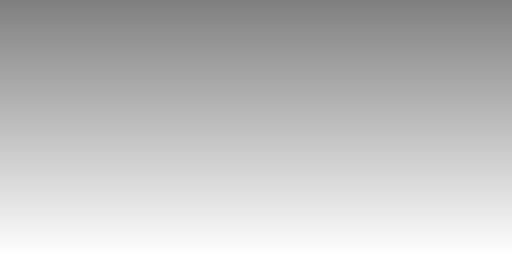

In [2189]:
array = get_gradient_3d(512, 256, (0, 0, 0), (255, 255, 255), (False, False, False))
im = Image.fromarray(np.uint8(array))
im.putalpha(127)
im

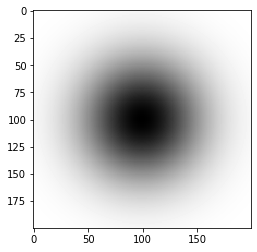

In [2309]:
plt.imshow(, cmap="gray")

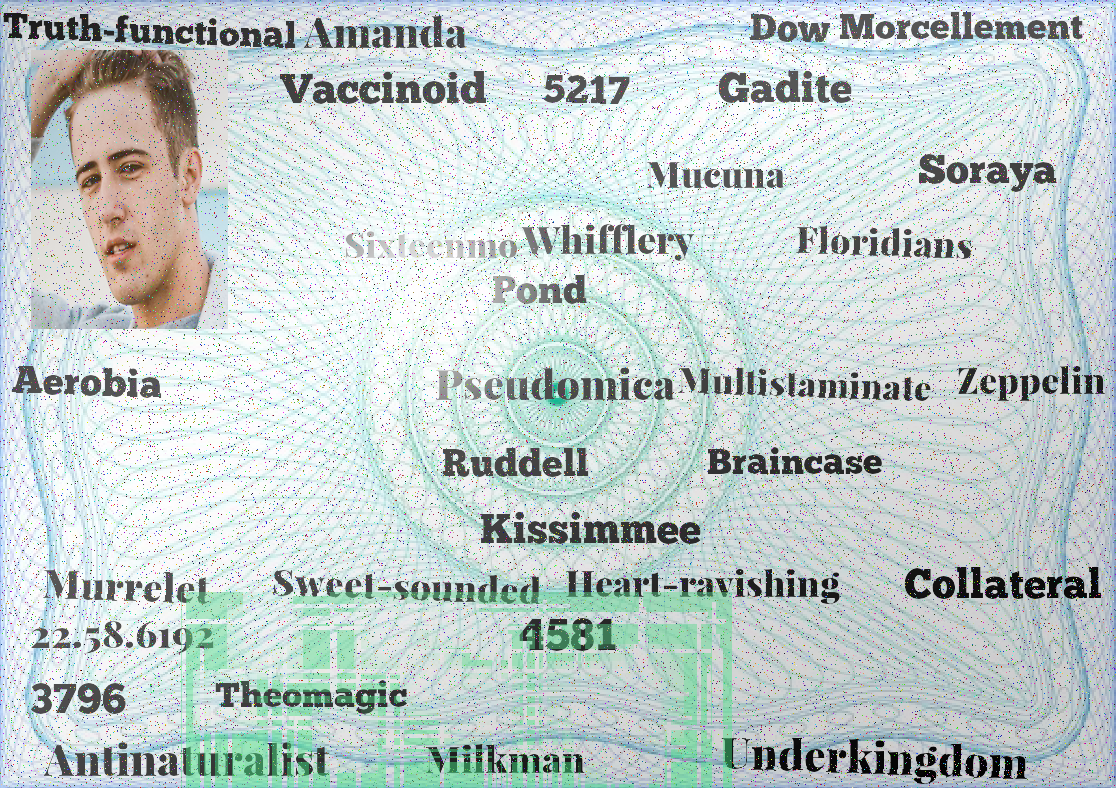

[0.788603666504134, 0.39737940580354925, 0.008713561472380449]

In [2164]:
import math
from PIL import Image, ImageDraw
  
w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)]
  
# creating new Image object
img = Image.new("RGB", (w, h))
  
# create  rectangleimage
img1 = ImageDraw.Draw(img)  
img1.rectangle(shape, outline ="green")
img.show()

In [50]:
for file in os.listdir(pathToBackGrounds):
    if file != "unnamed.gif":
        continue
    image = Image.open(os.path.join(pathToBackGrounds, file))
    imageTextGenerator = OneImageTextGenerator(image)
    imageTextGenerator.addTexts()
    
    break
    #imageTextGenerator.image2.save(pathToGenerated + "/"+ file + ".png" )
    #imageTextGenerator.textImage.save(pathToGenerated + "/GT"+ file + ".png" )

NameError: name 'OneImageTextGenerator' is not defined

C:\Users\Николай\diploma\fonts\Bebas-Regular.ttf


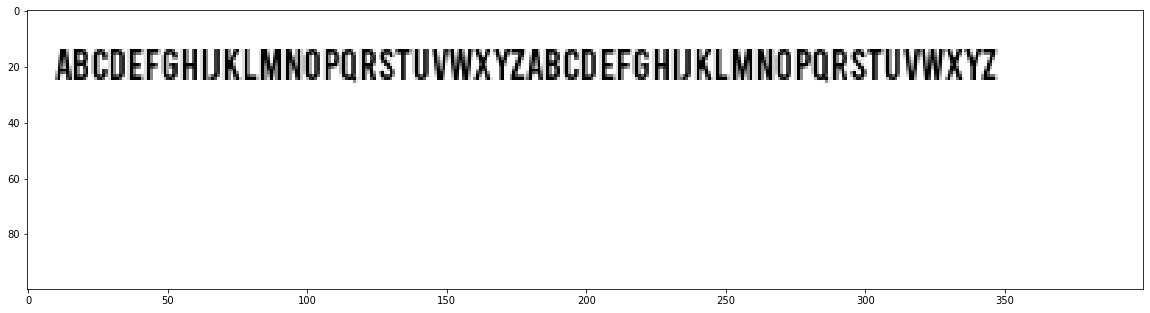

C:\Users\Николай\diploma\fonts\Chunk Five Print.otf


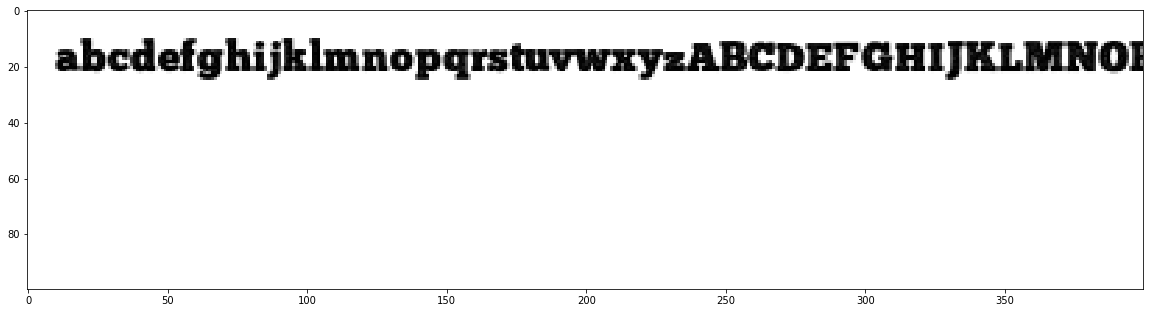

C:\Users\Николай\diploma\fonts\ChunkFive-Regular.otf


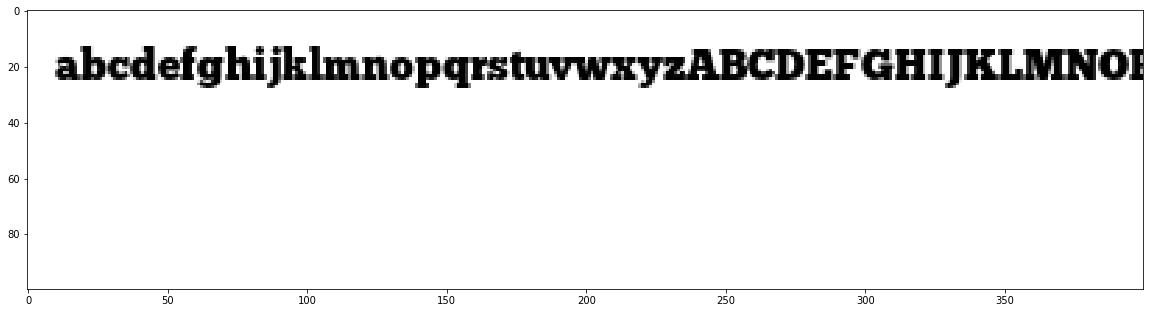

C:\Users\Николай\diploma\fonts\Montserrat-Regular.otf


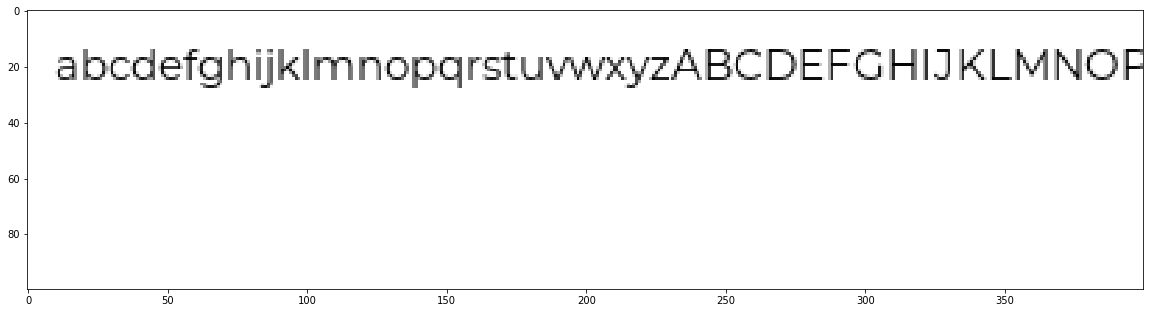

C:\Users\Николай\diploma\fonts\Montserrat-SemiBold.otf


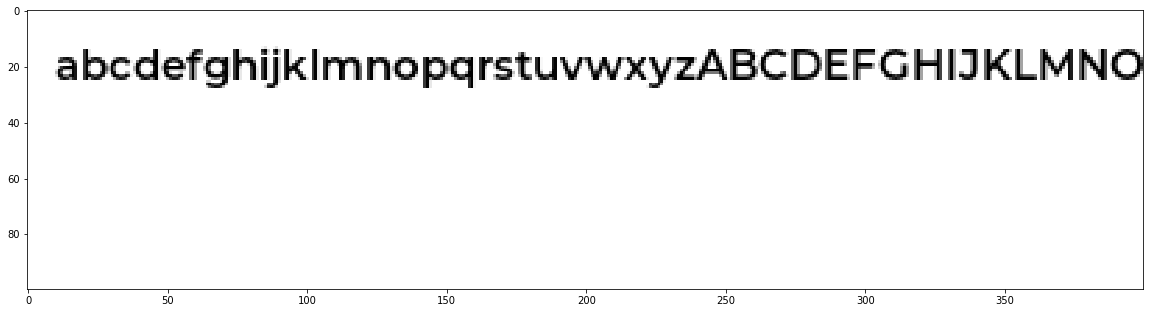

C:\Users\Николай\diploma\fonts\OpenSans-Bold.ttf


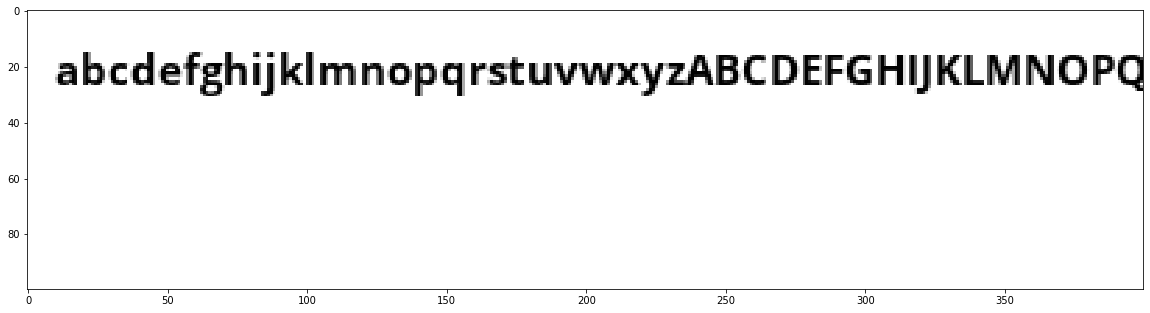

C:\Users\Николай\diploma\fonts\OpenSans-ExtraBold.ttf


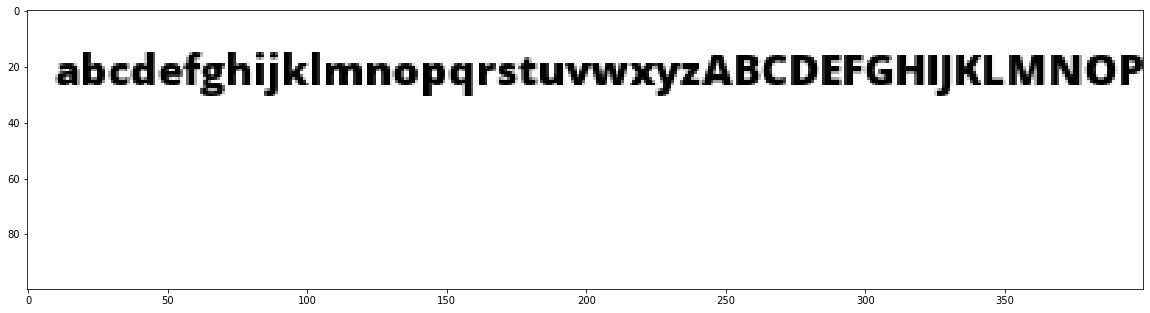

C:\Users\Николай\diploma\fonts\OpenSans-Regular.ttf


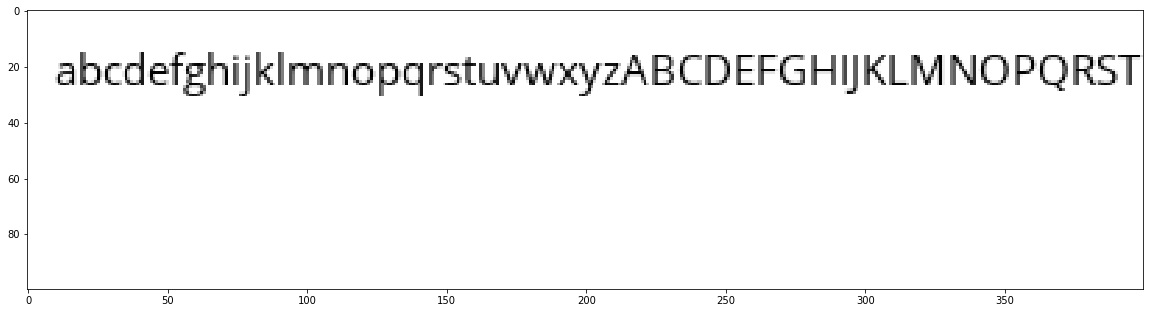

C:\Users\Николай\diploma\fonts\OpenSans-Semibold.ttf


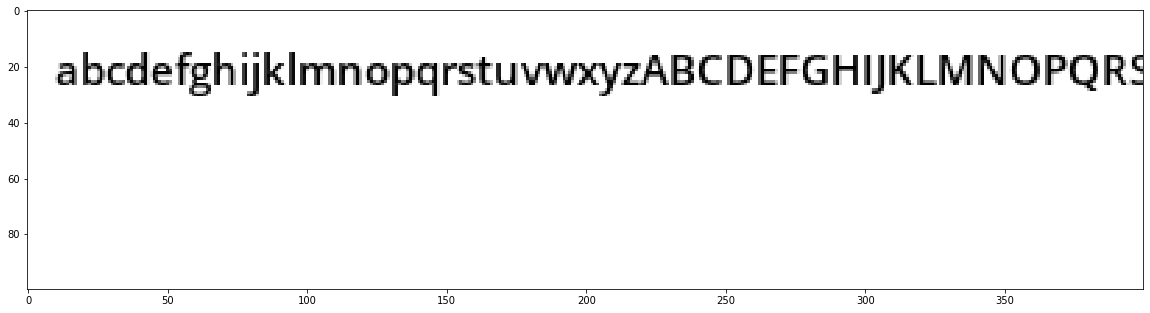

C:\Users\Николай\diploma\fonts\PlayfairDisplay-Black.otf


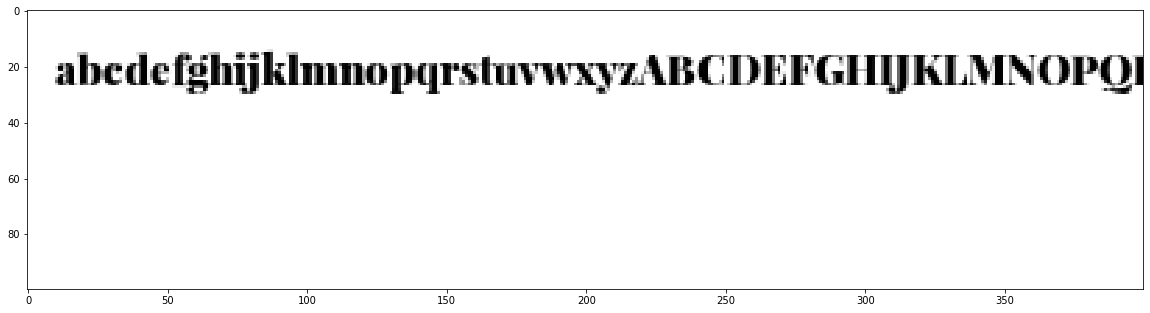

C:\Users\Николай\diploma\fonts\PlayfairDisplay-Regular.otf


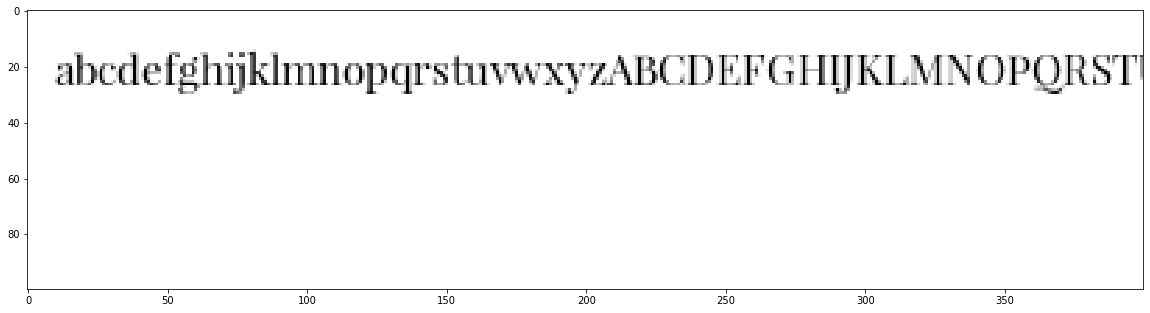

C:\Users\Николай\diploma\fonts\PlayfairDisplaySC-Bold.otf


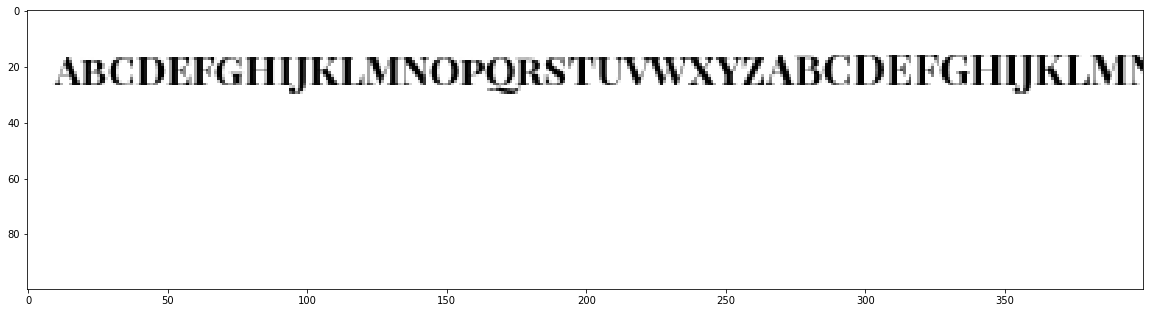

In [1462]:
fonts = [os.path.join(pathToFonts, font) for font in os.listdir(pathToFonts)]
for f in fonts:
    print(f)
    font = ImageFont.truetype(f, 15)
    img = Image.new('RGBA', (400,100), color=(255,255,255, 0))
    draw = ImageDraw.Draw(img)
    
    draw.text((10, 10), string.ascii_letters,  font=font, fill=(1,1,1,np.random.randint(255, 256)))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

In [242]:
from PIL import Image, ImageDraw, ImageFont

In [254]:
text = "fjsdlfhdkjl"

In [267]:
width = 1000
height = 1000


(66, 11)

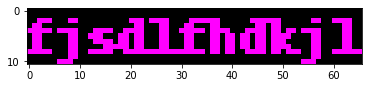

In [269]:
plt.imshow(np.array(timage)[:11,:66])